In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [6]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



##Encoding the object variables into integer using label encoding




In [10]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['sex'] = df['sex'].replace({'male':0,'female':1})

In [12]:
df['sex'].head()

,sex
0,1
1,0
2,0
3,0
4,0


In [13]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['smoker'] = df['smoker'].replace({'yes':1,'no':0})

In [15]:
df['smoker'].head()

,smoker
0,1
1,0
2,0
3,0
4,0


In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
df['region'] = df['region'].replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [18]:
df['region'].head()

,region
0,0
1,1
2,1
3,2
4,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


##Pair Plot

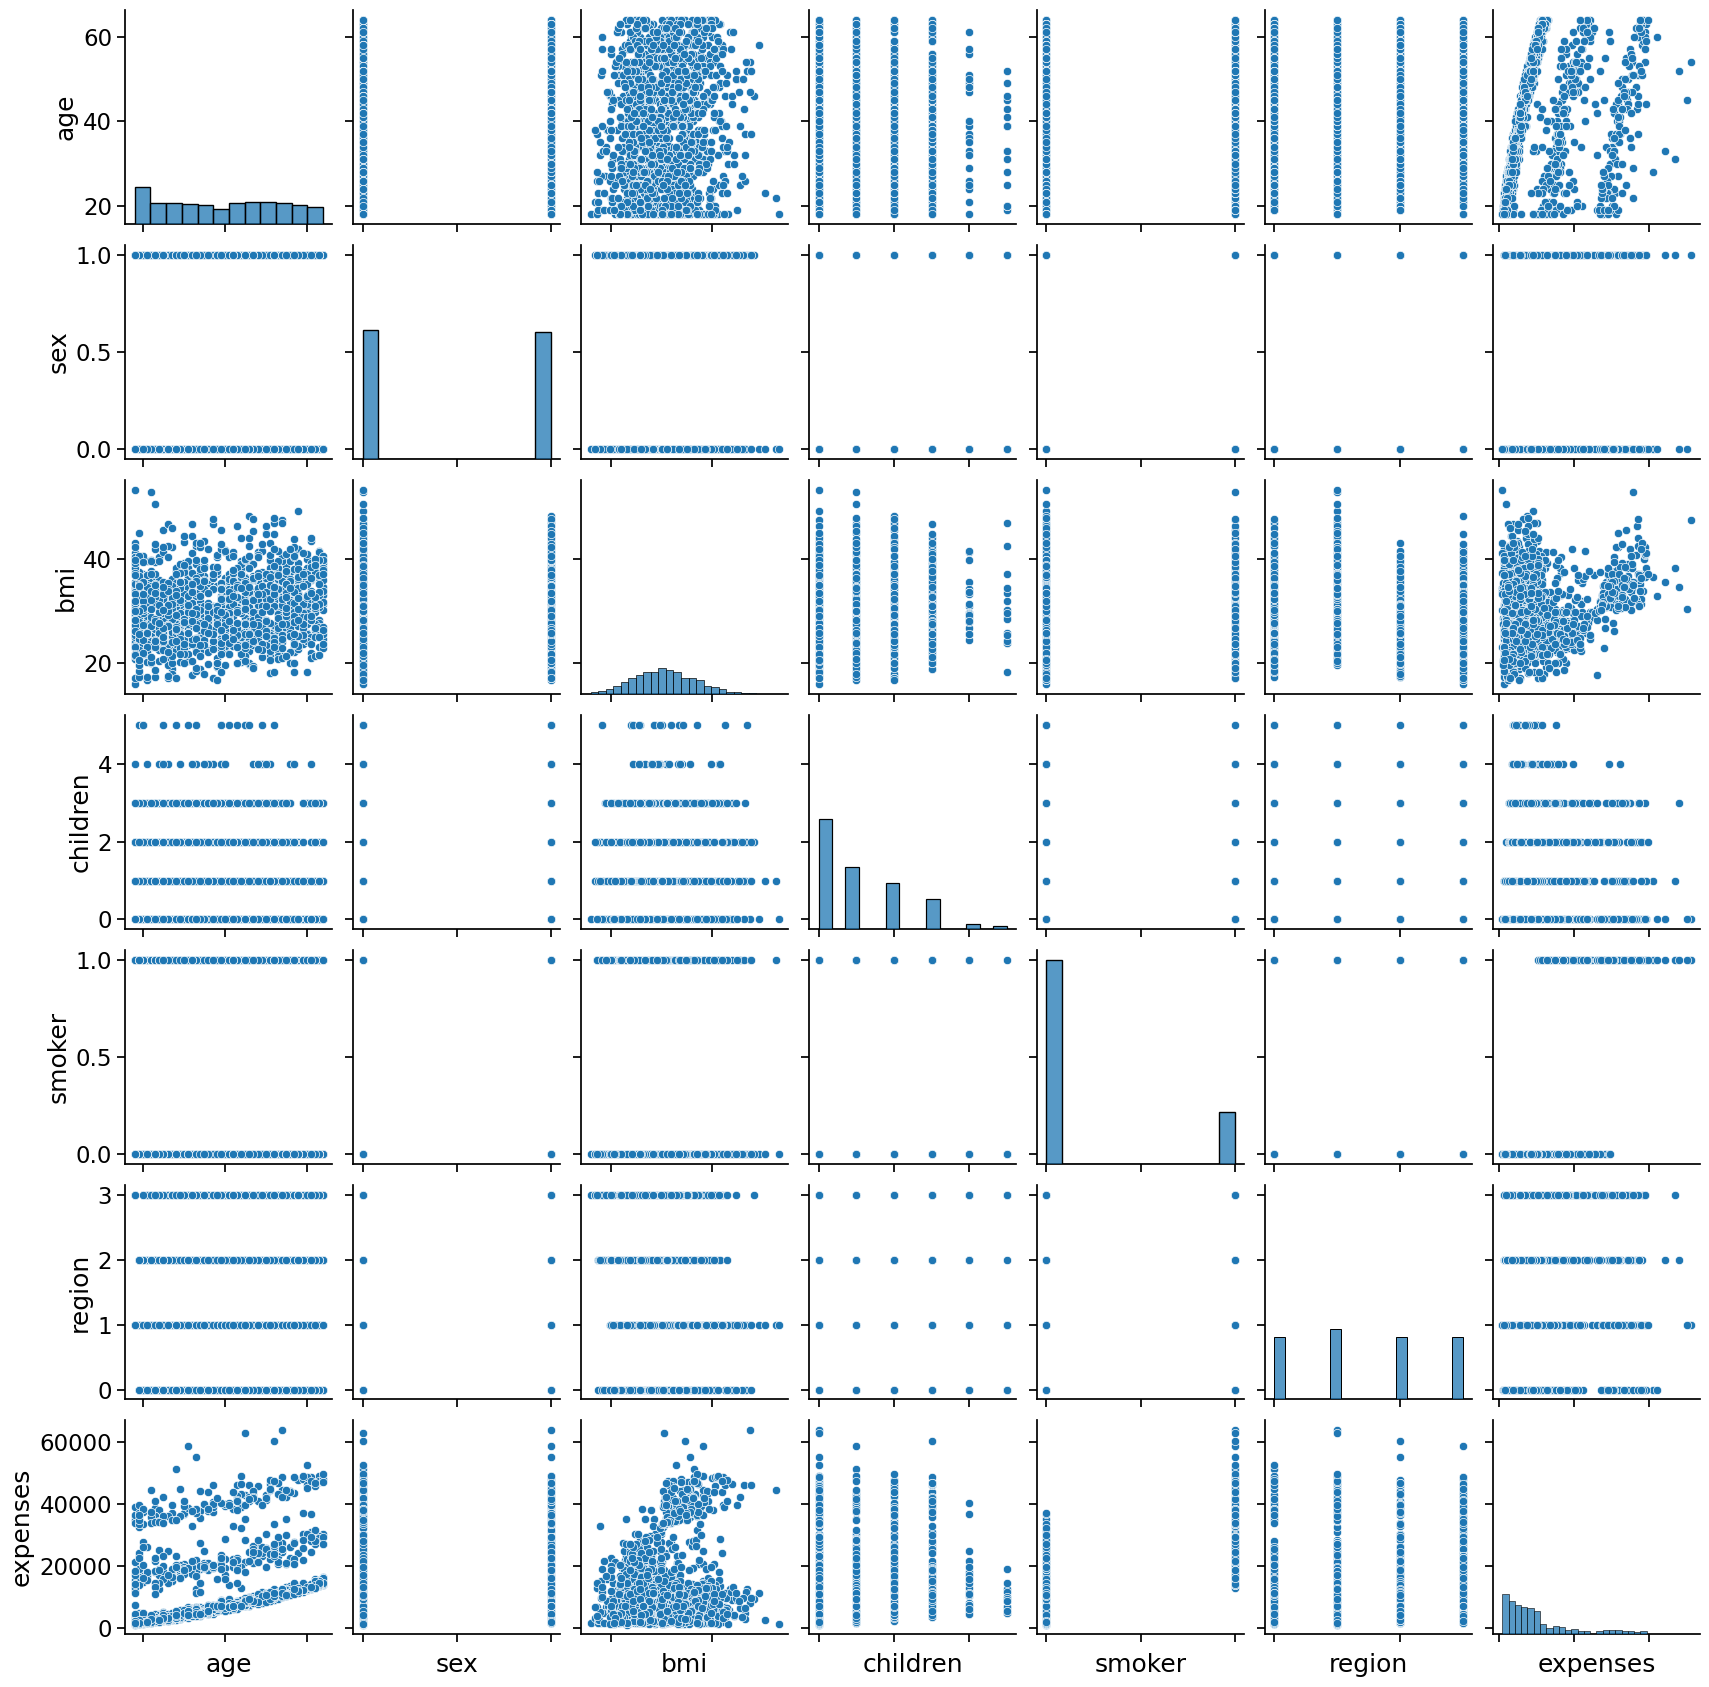

In [74]:
with sns.plotting_context('notebook',font_scale=1.5):
  g = sns.pairplot(df)
  g.set(xticklabels=[])
  plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [24]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


##Correlation

In [25]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,0.020856,0.109341,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046380,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109341,-0.046380,1.000000,0.012645,0.003968,-0.157439,0.198576
children,0.042469,-0.017163,0.012645,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003968,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157439,-0.016569,0.002181,1.000000,0.006208
expenses,0.299008,-0.057292,0.198576,0.067998,0.787251,0.006208,1.000000


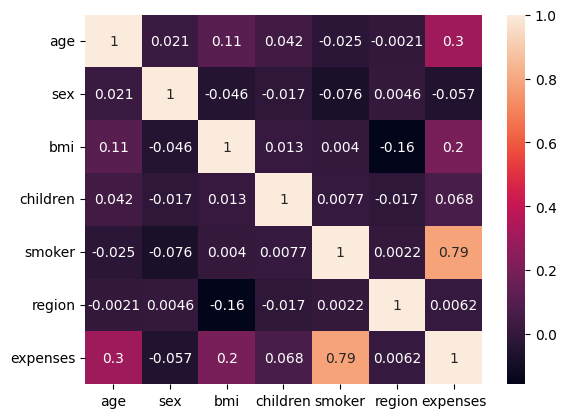

In [26]:
sns.heatmap(corr,annot=True)
plt.show()

In [27]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

##Model Before Feature Selection

In [54]:
X1 = df.iloc[:,1:].values
y1 = df.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [55]:
X_test1.shape

(268, 6)

In [56]:
X_train1.shape

(1070, 6)

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [58]:
regressor.fit(X_train1, y_train1)

LinearRegression()

In [59]:
y_pred1 = regressor.predict(X_test1)

In [60]:
print(y_pred1)

[40.3297279  39.85351355 50.24782392 42.6759883  42.36421066 36.57967239
 34.17893828 42.09762265 39.02594815 36.38583228 39.74703206 42.34769682
 38.48027752 36.12437489 24.69773056 42.25283015 43.97743741 34.30305225
 37.5505298  39.44066853 30.83946698 43.53054479 54.08263102 29.78300024
 32.04410253 34.87295086 36.78315563 38.70270871 35.53296746 39.32387579
 39.72186932 53.20183134 42.57773218 50.10046716 22.58486155 35.88749617
 38.19494964 55.83419225 46.0621763  32.63961855 38.15973602 33.93446754
 26.88325984 52.44854069 41.51685349 56.7948825  51.18237143 38.32195548
 37.25823438 53.90665981 33.81823504 50.40070254 29.73954496 51.86793539
 53.65179868 33.66288391 32.48501481 40.09268707 45.96919941 44.62438809
 32.12879269 52.49740419 44.35627839 40.04989891 41.24450934 39.80482152
 38.33000238 44.2449025  35.56851584 39.16645565 44.2184127  42.53092879
 22.55535689 44.11210483 44.95061742 44.83706581 38.69458267 38.50546105
 27.65138233 52.12526547 43.16056511 49.91781935 32

In [61]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))


Mean Absolute Error: 9.666400120631273
Mean Squared Error: 136.30504970499624
Root Mean Squared Error: 11.674975362072344
R2 Score: 0.2931746779397315


##R2 Score and Adjusted R2

In [77]:
print('R2 Score:', metrics.r2_score(y_test1, y_pred1))
print('Adjusted R2 Score:', 1 - (1-metrics.r2_score(y_test1, y_pred1))*(len(y_test1)-1)/(len(y_test1)-X_test1.shape[1]-1))

R2 Score: 0.2931746779397315
Adjusted R2 Score: 0.2769258199613346


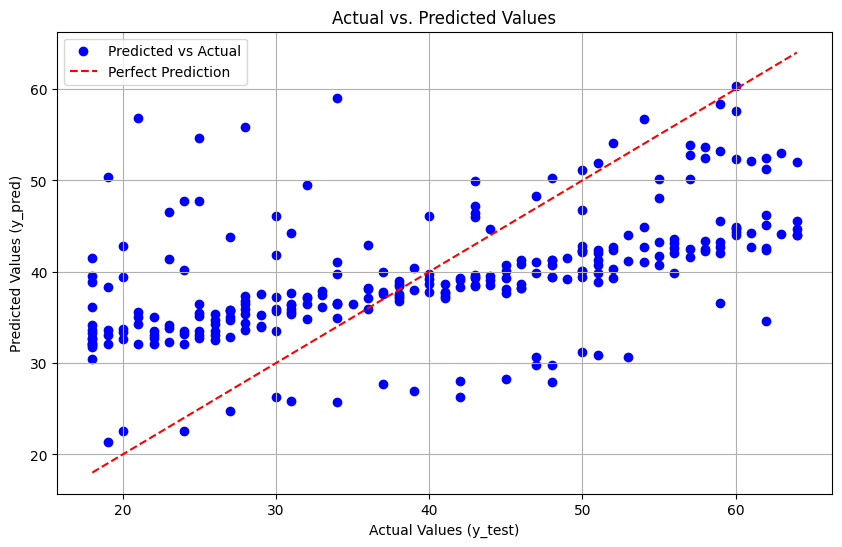

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test1, y_pred1, color='blue', label='Predicted vs Actual')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()

plt.grid(True)
plt.show()

##Anova Table

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('expenses ~age+sex+bmi+children+smoker+region', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df            F        PR(>F)
age       1.720387e+10     1.0   468.545268  2.888837e-89
sex       5.701826e+06     1.0     0.155288  6.935950e-01
bmi       5.287441e+09     1.0   144.002765  1.415416e-31
children  4.457369e+08     1.0    12.139588  5.096488e-04
smoker    1.228273e+11     1.0  3345.185901  0.000000e+00
region    1.987892e+08     1.0     5.413997  2.012536e-02
Residual  4.887117e+10  1331.0          NaN           NaN


In [64]:
anova_table['F'].sort_values()

,F
sex,0.155288
region,5.413997
children,12.139588
bmi,144.002765
age,468.545268
smoker,3345.185901
Residual,NaN


In [65]:
anova_table['PR(>F)'].sort_values()

,PR(>F)
smoker,0.000000e+00
age,2.888837e-89
bmi,1.415416e-31
children,5.096488e-04
region,2.012536e-02
sex,6.935950e-01
Residual,NaN


In [66]:
corr['expenses'].sort_values()

,expenses
sex,-0.057292
region,0.006208
children,0.067998
bmi,0.198576
age,0.299008
smoker,0.787251
expenses,1.000000


In [67]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        04:13:01   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.301e+04   1025.638    -12.684      0.0

##Hypothesis Testing

In [68]:
p_values = model.pvalues

print("\nHypothesis Testing Results: \n")
for predictor, p_value in p_values.items():
    if predictor == 'const':
        continue

    print(f"Predictor: {predictor}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  Reject the null hypothesis. The predictor '{predictor}' is statistically significant.\n")
    else:
        print(f"  Fail to reject the null hypothesis. The predictor '{predictor}' is not statistically significant.\n")


Hypothesis Testing Results: 

Predictor: Intercept, p-value: 0.0000
  Reject the null hypothesis. The predictor 'Intercept' is statistically significant.

Predictor: age, p-value: 0.0000
  Reject the null hypothesis. The predictor 'age' is statistically significant.

Predictor: sex, p-value: 0.6936
  Fail to reject the null hypothesis. The predictor 'sex' is not statistically significant.

Predictor: bmi, p-value: 0.0000
  Reject the null hypothesis. The predictor 'bmi' is statistically significant.

Predictor: children, p-value: 0.0005
  Reject the null hypothesis. The predictor 'children' is statistically significant.

Predictor: smoker, p-value: 0.0000
  Reject the null hypothesis. The predictor 'smoker' is statistically significant.

Predictor: region, p-value: 0.0201
  Reject the null hypothesis. The predictor 'region' is statistically significant.



##New Model with Selected Features

In [69]:
X2 = df[['age','smoker','bmi','children','region']]
y2 = df['expenses']
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

y_pred2 = regressor.predict(X_test2)

In [71]:
#After feature selection
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))


Mean Absolute Error: 3931.5586882238113
Mean Squared Error: 31847284.289706636
Root Mean Squared Error: 5643.339816961818
R2 Score: 0.7998661993083529


##R2 and Adjusted R2

In [76]:
print('R2 Score:', metrics.r2_score(y_test2, y_pred2))
print('Adjusted R2 Score:', 1 - (1-metrics.r2_score(y_test2, y_pred2))*(len(y_test2)-1)/(len(y_test2)-X_test2.shape[1]-1))

R2 Score: 0.7998661993083529
Adjusted R2 Score: 0.7960468519669093


##Regression Line after Feature Selection with Annova

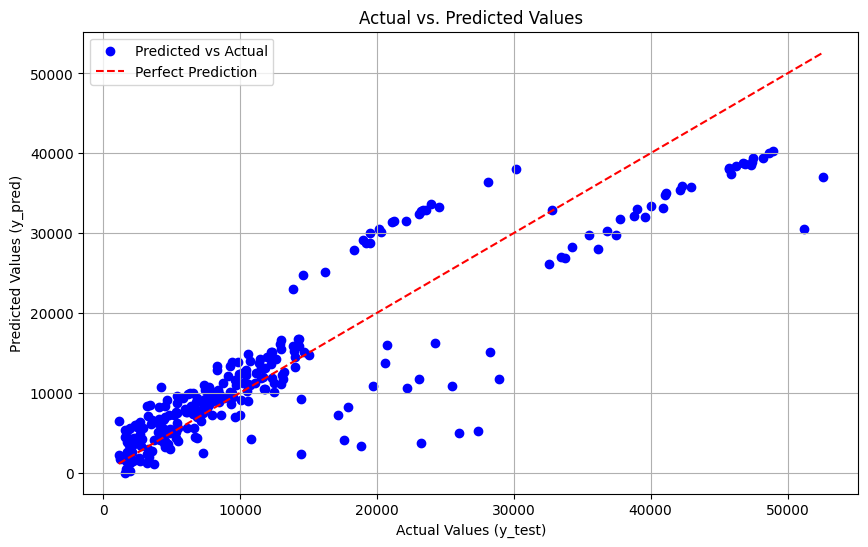

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred2, color='blue', label='Predicted vs Actual')

plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()

plt.grid(True)
plt.show()

## New model and old model R2 scores

In [78]:
print('R2 Score before :', metrics.r2_score(y_test1, y_pred1))
print('Adjusted R2 Score:', 1 - (1-metrics.r2_score(y_test1, y_pred1))*(len(y_test1)-1)/(len(y_test1)-X_test1.shape[1]-1))
print('R2 Score after :', metrics.r2_score(y_test2, y_pred2))
print('Adjusted R2 Score:', 1 - (1-metrics.r2_score(y_test2, y_pred2))*(len(y_test2)-1)/(len(y_test2)-X_test2.shape[1]-1))

R2 Score before : 0.2931746779397315
Adjusted R2 Score: 0.2769258199613346
R2 Score after : 0.7998661993083529
Adjusted R2 Score: 0.7960468519669093
